Importing the Libraries

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

Data collection and processing

In [31]:
#loading the csv data to pandas DataFrame
gold_data = pd.read_csv('/content/gld_price_data.csv')

In [32]:
#Print first 5 rows in the DataFrame
gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [33]:
#last 5 rows of the dataFrame
gold_data.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [34]:
#Number of rows and Columns
gold_data.shape

(2290, 6)

In [35]:
#getting some basic information about the data
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [36]:
gold_data.isnull().sum()

,0
Date,0
SPX,0
GLD,0
USO,0
SLV,0
EUR/USD,0


In [37]:
#getting the statistical measures of the data
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


Correlation:
  1. Positive correlation
  2. Negative correlation
  

In [38]:
correlation = gold_data.corr(numeric_only=True)
print(correlation)


              SPX       GLD       USO       SLV   EUR/USD
SPX      1.000000  0.049345 -0.591573 -0.274055 -0.672017
GLD      0.049345  1.000000 -0.186360  0.866632 -0.024375
USO     -0.591573 -0.186360  1.000000  0.167547  0.829317
SLV     -0.274055  0.866632  0.167547  1.000000  0.321631
EUR/USD -0.672017 -0.024375  0.829317  0.321631  1.000000


In [39]:
correlation = gold_data.select_dtypes(include=['number']).corr()
print(correlation)


              SPX       GLD       USO       SLV   EUR/USD
SPX      1.000000  0.049345 -0.591573 -0.274055 -0.672017
GLD      0.049345  1.000000 -0.186360  0.866632 -0.024375
USO     -0.591573 -0.186360  1.000000  0.167547  0.829317
SLV     -0.274055  0.866632  0.167547  1.000000  0.321631
EUR/USD -0.672017 -0.024375  0.829317  0.321631  1.000000


In [40]:
gold_data['Date'] = pd.to_datetime(gold_data['Date'])


<Axes: >

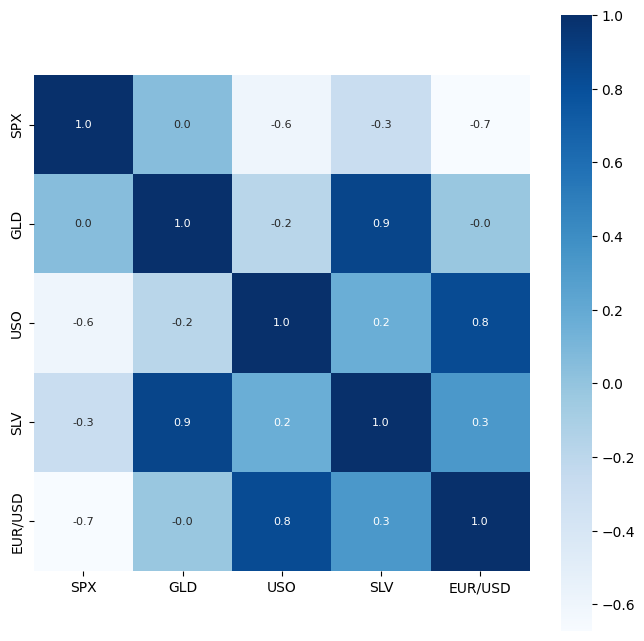

In [41]:
# constructing a heatmap to understand the correlatiom
plt.figure(figsize = (8,8))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f',annot=True, annot_kws={'size':8}, cmap='Blues')

In [42]:
#correlation values of GLD
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


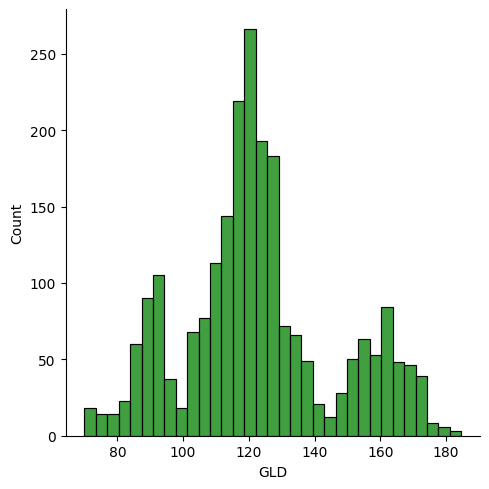

In [43]:
#checking the distribution of the GLD price
sns.displot(gold_data['GLD'],color='green')

Splitting the Features and Target

In [44]:
X = gold_data.drop(['Date','GLD'],axis=1)
Y = gold_data['GLD']

In [45]:
print(X)
print(Y)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]
0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


Splitting into Training data and Test Data

In [46]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y ,test_size = 0.2, random_state=2)

Model Training: Random Forest Regressor


In [47]:
regressor = RandomForestRegressor(n_estimators=100)


In [48]:
#training the model
regressor.fit(X_train,Y_train)

RandomForestRegressor()

Model Evaluation

In [49]:
#pediction on Test Data
test_data_prediction = regressor.predict(X_test)

In [50]:
print(test_data_prediction)

[168.64850003  81.91209961 115.79099989 127.53210051 120.69850122
 154.4969975  149.96199902 126.02950048 117.54229885 126.01160089
 116.56040085 172.23730039 140.79419824 167.97149928 115.15220012
 117.75530067 137.81760347 170.28230096 159.66990246 160.81230029
 155.01489999 125.32120025 175.77010023 157.25880374 125.17300044
  93.95150002  77.52730015 120.29889979 119.11419947 167.47669981
  88.15380086 125.35300054  91.23840072 117.82600012 121.24119927
 137.04280128 115.68060106 115.00720067 148.60840016 107.25570109
 104.15780254  87.17199793 126.54390053 118.13589993 153.45569899
 119.52069976 108.35069985 108.05579843  93.16730035 127.14539787
  75.19210019 113.74079935 121.47050016 111.19049946 118.84809875
 120.73529953 159.08359964 168.43350098 147.0368965   85.81509842
  94.28990025  86.7817987   90.53710028 119.1105006  126.48610076
 127.57470026 168.98630061 122.14549935 117.38049902  98.66430027
 167.99450182 143.088698   132.51840254 121.24470232 121.40419979
 119.95520

In [51]:
#R squarred Error

error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R Squared error",error_score)

R Squared error 0.9890136491763084


Compare the Actual Values and Predicted Values in a plot

In [53]:
Y_test = list(Y_test)

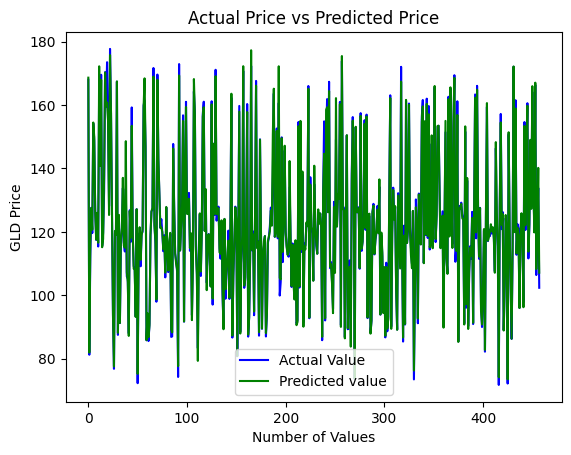

In [56]:
plt.plot(Y_test,color = 'Blue',label = 'Actual Value')
plt.plot(test_data_prediction,color = 'Green',label = 'Predicted value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of Values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()